In [477]:
#pip3 install wheel
#pip3 install pandas

import pandas as pd
import requests
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 999

#!pip3 install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [478]:
# find out total number of pages
url = 'https://api.ergoplatform.com/api/v1/tokens?limit=500&offset=' + str(i)
r = requests.get(url)
json = r.json()
total_record = int(json['total'])
print("Total record: " +str(total_record))

# results will be appended to this list
all_items = []

for offset in range(0,total_record,500):
    url = "https://api.ergoplatform.com/api/v1/tokens?limit=500&offset="+str(offset)              
    r = requests.get(url)      
    json = r.json() 
    all_items.append(json)        
    print(offset)

Total record: 27728
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500


In [479]:
from pandas import json_normalize
import json

# normalise the data
df = json_normalize(all_items,"items",['items'])

# drop unwanted columns 
df = df.drop(['emissionAmount', 'type', 'decimals', 'boxId', 'items' ],axis =1)

# keep only stake-keys
df = df[df.name.str.contains("ergopad Stake Key").fillna(False)]

# for investigating parsing errors 
# df.to_csv("to_fix.csv", index=False)

df.head()


,id,name,description
0,a22113b6beb75fee014055644f3223ba6274f7b5b7136f...,ergopad Stake Key,"{""originalAmountStaked"": 41359.36, ""stakeTime""..."
1,90bea4dae9cbfb22f5862d7565581788aa6713bc74d522...,ergopad Stake Key,"{""originalAmountStaked"": 1194.79, ""stakeTime"":..."
2,586a71a739fac06020d8e5d47a8999d502a0e83316e9b1...,ergopad Stake Key,"{""originalAmountStaked"": 2424.27, ""stakeTime"":..."
3,3f02dadbff463b8dbf0494d01f2f41b6115cf24e2e837a...,ergopad Stake Key,"{""originalAmountStaked"": 540.8, ""stakeTime"": ""..."
4,96804af00513ae139b039d166345b62b950416feb137e9...,ergopad Stake Key,"{""originalAmountStaked"": 2129.5, ""stakeTime"": ..."


In [480]:
#df = pd.read_csv("to_fix.csv")

# drop 5 problematic rows at end with different format
df.drop(df.tail(5).index,inplace=True)

# Map JSON in 'description' column to new columns
df[['originalAmountStaked','stakeTime']]=df['description'].map(eval).apply(pd.Series)

# Drop unwanted column
df = df.drop(['description' ],axis =1)

# How many stake keys do we have? 
df.count()


id                      749
name                    749
originalAmountStaked    749
stakeTime               749
dtype: int64

In [487]:
#pd.reset_option('all')

In [482]:
# sort by amount staked
df.sort_values(by=['originalAmountStaked'],inplace=True, ascending=False)

# save to .csv
df.to_csv("stakers.csv", index=False)

# Display rich-list
df.head(10)

,id,name,originalAmountStaked,stakeTime
1082,db1f54e1aa84d16756e64bef71362f0d6bc0ee18af25a6...,ergopad Stake Key,3010641.93,2022-02-27 21:30:27.412025
453,d547395c05dde733b75b6a35517a958915555a199d0b65...,ergopad Stake Key,1000000.00,2022-03-01 17:48:02.340470
203,147b2789ed1f2a0e60ab325c0bddae94a08a1c6dd23d50...,ergopad Stake Key,1000000.00,2022-03-03 22:43:04.496828
454,7c0d1d22e0f366a048519357281bd13bbe8e7320665bc1...,ergopad Stake Key,1000000.00,2022-03-01 17:40:58.156367
895,cb8cf1cf971177767b7429241353576643e8efe88cc0e1...,ergopad Stake Key,666666.00,2022-02-28 02:16:20.097260
908,85844a18657774dd430d6e8d7cd90f6ec9b50ef166a8ff...,ergopad Stake Key,535353.32,2022-02-28 01:45:08.015809
1075,6de153bbeb2cddc08229c36100c2097a23147d43d5bcd5...,ergopad Stake Key,500634.66,2022-02-27 21:59:55.880988
873,f769be443e4715ecb09ab8f5a449b304b7cda01f66bf1a...,ergopad Stake Key,500005.59,2022-02-28 03:29:07.472945
894,cfccf46a40bc25bd345eb8f429dc3addabbb296fa29a98...,ergopad Stake Key,444426.66,2022-02-28 02:19:29.607355
1085,7a41e485cbab1822839983765bb0b7b884782fd7b3ad5f...,ergopad Stake Key,429807.95,2022-02-27 20:46:58.995302


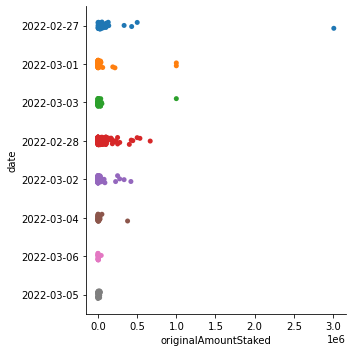

In [483]:
# Plotting

#sns.jointplot(x=df['original'], y=df['time'], data=df, kind='reg')

#df.hist()

#sns.catplot(x="date", y="original", jitter=False, data=df)
#sns.catplot(x="original", y="date", hue="time", kind="swarm", data=df)

# Grab just the date
df['date'] = df['stakeTime'].str.slice(0,10)

# Plot 
sns.catplot(x="originalAmountStaked", y="date",  data=df)



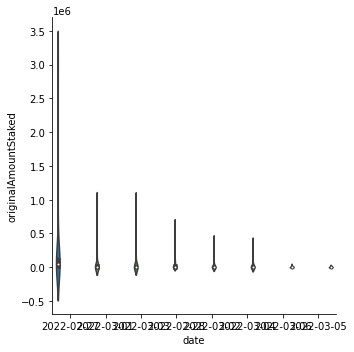

In [485]:
# violin plot
sns.catplot(x="date", y="originalAmountStaked", hue="date",
            kind="violin", data=df)

In [492]:
# trimming top 5 
df_trim = df.iloc[5: , :]
df_trim.head(5)

,id,name,originalAmountStaked,stakeTime,date
908,85844a18657774dd430d6e8d7cd90f6ec9b50ef166a8ff...,ergopad Stake Key,535353.32,2022-02-28 01:45:08.015809,2022-02-28
1075,6de153bbeb2cddc08229c36100c2097a23147d43d5bcd5...,ergopad Stake Key,500634.66,2022-02-27 21:59:55.880988,2022-02-27
873,f769be443e4715ecb09ab8f5a449b304b7cda01f66bf1a...,ergopad Stake Key,500005.59,2022-02-28 03:29:07.472945,2022-02-28
894,cfccf46a40bc25bd345eb8f429dc3addabbb296fa29a98...,ergopad Stake Key,444426.66,2022-02-28 02:19:29.607355,2022-02-28
1085,7a41e485cbab1822839983765bb0b7b884782fd7b3ad5f...,ergopad Stake Key,429807.95,2022-02-27 20:46:58.995302,2022-02-27


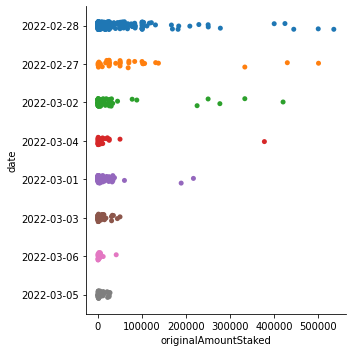

In [493]:
# Distribution without the top 20
sns.catplot(x="originalAmountStaked", y="date",  data=df_trim)